Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 6** | **Performing Face Recognition**
**Name** | Apuyan, Viktor Angelo
**Section** | CPE32S3
**Date Performed**: |February 21, 2025
**Date Submitted**: |February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

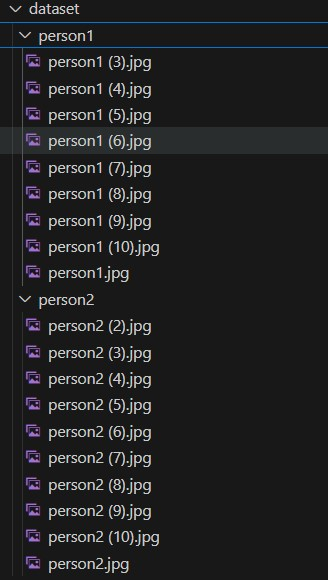

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename.startswith('.'):  # skip hidden/system files
                        continue

                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    # If imread failed, skip
                    if im is None:
                        print(f"Skipping file {filepath} - not a valid image.")
                        continue

                    # Resize the images to the prescribed size
                    if sz is not None:
                        im = cv2.resize(im, (200,200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except Exception as e:
                    print("Unexpected error:", e)
                    raise
            c += 1
    return [X, y]

In [ ]:
dataset_path = r"C:\Users\apuyan\Desktop\Angelo\dataset"
img_dataset = read_images(dataset_path)
img_dataset

Skipping file C:\Users\apuyan\Desktop\Angelo\dataset\person1\image_test - not a valid image.


[[array([[16, 15, 14, ..., 46, 46, 46],
         [10, 10, 10, ..., 48, 48, 49],
         [ 9,  8,  8, ..., 46, 47, 47],
         ...,
         [11, 12, 10, ...,  5,  5,  5],
         [12, 12, 10, ...,  7,  7,  8],
         [13, 13, 10, ...,  8,  9,  9]], dtype=uint8),
  array([[ 22,  21,  20, ..., 200, 210, 202],
         [ 21,  21,  20, ..., 193, 198, 197],
         [ 20,  20,  20, ..., 199, 196, 198],
         ...,
         [  9,   9,   9, ...,   5,   5,   5],
         [  9,   9,   9, ...,   5,   5,   5],
         [ 10,  10,  10, ...,   5,   5,   5]], dtype=uint8),
  array([[ 21,  21,  21, ..., 201, 208, 202],
         [ 20,  20,  20, ..., 198, 200, 193],
         [ 19,  19,  19, ..., 194, 195, 194],
         ...,
         [ 10,  10,  10, ...,   5,   5,   5],
         [ 10,  10,  10, ...,   5,   5,   5],
         [  9,   9,   9, ...,   5,   5,   5]], dtype=uint8),
  array([[ 23,  22,  21, ..., 203, 202, 200],
         [ 22,  21,  20, ..., 205, 204, 201],
         [ 20,  20,  20, ...,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

The function only takes the filepath of the dataset, with the dataset folder containing subfolders of people we want to detect. These subfolders would then contain the images themselves, with the function then converting these images into arrays of numbers with labels which is used by the machine learning model later. The challenge that I encountered in running the code is understanding how the file system should work for the dataset to be converted properly.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl (46.2 MB)
Note: you may need to restart the kernel to use updated packages.


Eigenface Recognition

In [ ]:
def face_rec():
  names = ['Me', 'Sibling'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\apuyan\Desktop\Angelo\dataset", (200,200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\apuyan\Desktop\Angelo\haarcascade_frontalface_default.xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Skipping file C:\Users\apuyan\Desktop\Angelo\dataset\person1\image_test - not a valid image.


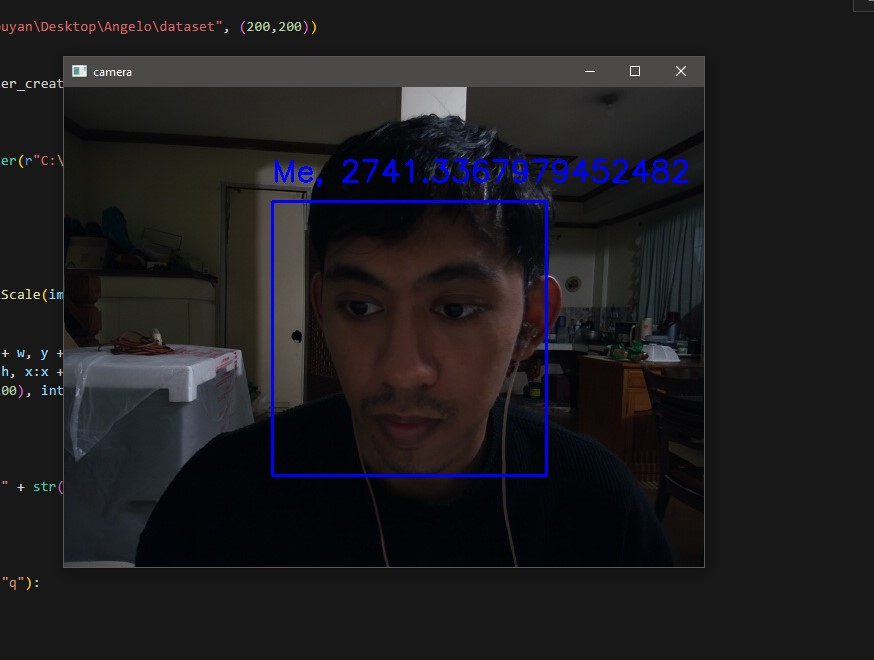

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

In essence, the system compares how closely a new face resembles a set of pre-calculated "face templates" (Eigenfaces) in order to identify it.  The more closely a piece fits into its designated slot, the more probable it is to be the right identification. It's similar to matching a puzzle piece.  By ensuring a specific degree of assurance prior to proclaiming a match, the confidence threshold lowers the possibility of misidentification. A problem that I encountered was the program not being able to recognize cv2.face and to solve that I have to install opencv-contrib-python --user to install the face modules in open cv to run the program.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

FisherFaceRecognizer

In [ ]:
def fisher_face_rec():
    names = ['Me', 'Sibling']
    if len(sys.argv) < 2:
        print("USAGE: facerec_demo_fisher.py </path/to/images> [</path/to/store/images/at>]")
        sys.exit()

    [X, y] = read_images(r"C:\Users\apuyan\Desktop\Angelo\dataset", (200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r"C:\Users\apuyan\Desktop\Angelo\haarcascade_frontalface_default.xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(roi)
                label = names[label_id]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("FisherFace Recognizer", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    fisher_face_rec()

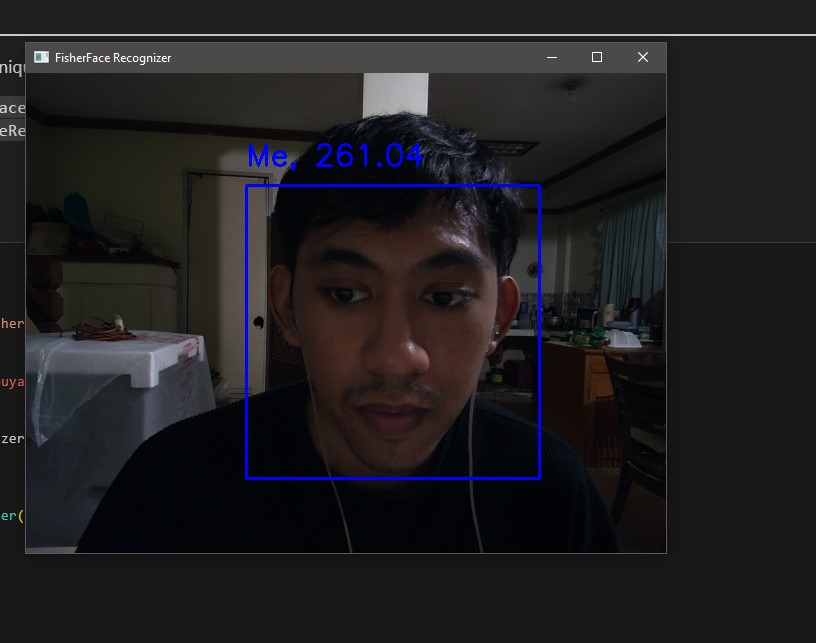

LBPH Recognizer

In [ ]:
import cv2
import sys
import numpy as np

def lbph_face_rec():
    names = ['Me', 'Sibling']
    if len(sys.argv) < 2:
        print("USAGE: facerec_demo_lbph.py </path/to/images> [</path/to/store/images/at>]")
        sys.exit()

    [X, y] = read_images(r"C:\Users\apuyan\Desktop\Angelo\dataset", (200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r"C:\Users\apuyan\Desktop\Angelo\haarcascade_frontalface_default.xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(roi)
                label = names[label_id]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("LBPH Face Recognizer", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    lbph_face_rec()

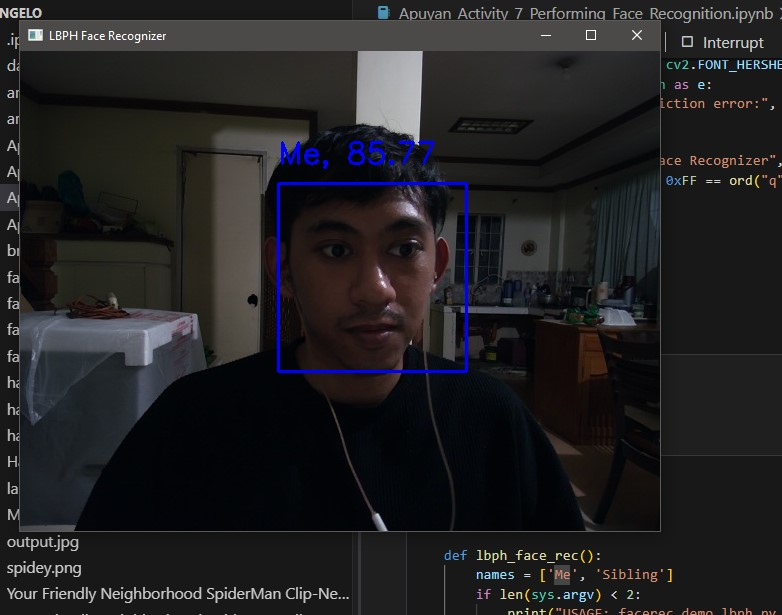

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

The projected label and confidence score are provided by the two-element array that the predict() method in facial recognition returns.  Building accurate face recognition algorithms, analyzing the data, and making defensible conclusions all depend on these values.  I hope that this clarification makes the significance of the returned values clear.  If you have any more queries, please contact me.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

## 5. Summary, Conclusions and Lessons Learned

Through the use of Eigenfaces, Fisherfaces, and LBPH algorithms, this exercise gave us invaluable practical experience with face recognition techniques.  I gained knowledge about creating picture datasets, training models, and assessing how well they work on hidden data.  Regarding accuracy and computing efficiency, I found that each method had distinct advantages and disadvantages, with LBPH frequently demonstrating more resistance to changes in lighting. The difficulties faced brought to light how accuracy is affected by algorithm selection and image quality.  In the end, I developed a stronger comprehension of the real-world uses of facial recognition technology.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*